# Assignment-03-Q1 (Hypothesis Testing)

A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions. Consider Cutlets.csv as the dataset.

## Ans.

We are going to conduct a 2 tailed t-Test on 2 Independent samples with Numerical Data. 
We need to check whether the mean of both samples are different and Is there any significant difference between the two sample.

### Step 1

Make two Hypothesis one contradicting to other
Null Hypothesis is what we want to prove  
Null Hypothesis: Ho: μ1 = μ2 (There is no difference in diameters of cutlets between two units).  
Alternative Hypthosis: Ha: μ1 ≠ μ2 (There is significant difference in diameters of cutlets between two units).

### Step 2

Decide a cut-off value
<ul>
<li>Significance 5% </li>
<li>alpha = 0.05 </li>
</ul>
As it is a two-tailed test  
<ul>
<li>alpha/2 = 0.025 </li>
</ul>

### Step 3

Collect Evidence

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm

In [2]:
df=pd.read_csv('03_04_Cutlets.csv')
df.head(3)

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300


In [3]:
unitA = df['Unit A']
unitB = df['Unit B']

#### 2-sample 2-tail ttest

In [4]:
test_statistic, p_value = stats.ttest_ind(unitA,unitB)
test_statistic 

0.7228688704678063

#### Two methods to decide where we should accept or reject the null hypothesis.

#### Method A: Using Critical values

In [5]:
critical_value = stats.chi2.ppf(0.95,3)
critical_value

7.814727903251179

In [6]:
if test_statistic >= critical_value:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

Independent (fail to reject H0)


#### Method B: Using p values

Interpret the results:   
If the p-value is less than the significance level alpha (5% in this case), we reject the null hypothesis and conclude that there is a significant difference in the diameter of the cutlet between the two units.  
If the p-value is greater than the significance level, we fail to reject the null hypothesis and conclude that there is not enough evidence to suggest a significant difference.

In [7]:
alpha = 0.025
print('Significance=%.3f, p=%.3f\n' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis that there is a significant difference between two Units A and B')
else:
    print('We fail to reject Null hypothesis')

Significance=0.025, p=0.472

We fail to reject Null hypothesis


### Since p_value > alpha , We fail to reject Null Hypothesis that there is no significant difference between the two samples.

# Assignment-03-Q2 (Hypothesis Testing)

A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch. Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.
Dataset is LabTAT.csv

## Ans.

This problem is regarding Analysis of variance between more than 2 samples or columns. We are going to conduct a ANOVA Test on 4 Independent samples with Numerical Data. 
We need to check whether the mean of any of these samples are different or the same.

### Step 1

Make two Hypothesis one contradicting to other  
Null Hypothesis is what we want to prove  
Null Hypothesis Ho as: μ1 = μ2 = μ3 = μ4, All samples TAT population means are same.    
Alternative Hypthosis Ha as: Atleast one sample TAT population mean is different

### Step 2

Decide a cut-off value
<ul>
<li>Significance 5% </li>
<li>alpha = 0.05 </li>
</ul>

### Step 3

Collect Evidence

In [8]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm

In [9]:
df = pd.read_csv('03_05_LabTAT.csv')
df.head(3)

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18


#### Anova ftest statistics: stats.f_oneway(column-1,column-2,column-3,column-4)

In [10]:
test_statistic , p_value=stats.f_oneway(df.iloc[:,0],df.iloc[:,1],df['Laboratory 3'],df['Laboratory 4'])
test_statistic , p_value

(118.70421654401437, 2.1156708949992414e-57)

#### Two methods to decide where we should accept or reject the null hypothesis.

#### Method A: Using Critical values

In [11]:
critical_value = stats.chi2.ppf(0.95,3)
critical_value

7.814727903251179

In [12]:
if test_statistic >= critical_value:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

Dependent (reject H0)


#### Method B: Using P values

Compare p_value with Significane Level alpha.  

If p_value is != alpha we failed to reject Null Hypothesis because of lack of evidence  
If p_value is = alpha we reject Null Hypothesis 

In [13]:
alpha = 0.05
print('Significance=%.3f, p=%.3f\n' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significant difference between TAT of reports of the laboratories')
else:
    print('Independent. We fail to reject Null hypothesis')

Significance=0.050, p=0.000

We reject Null Hypothesis there is a significant difference between TAT of reports of the laboratories


### Since Hence, We fail to reject Null Hypothesis because of lack evidence, there is no significant difference between the samples

# Assignment-03-Q3 (Hypothesis Testing)

Sales of products in four different regions is tabulated for males and females. Find if male-female buyer rations are similar across regions.

## 
<table>
<tr>
<th> </th>
<th> East </th>
<th> West </th>
<th> North </th>
<th> South </th>
</tr>
<tr>
<td> Males </td>
<td> 50 </td>
<td> 142 </td>
<td> 131 </td>
<td> 70 </td>
</tr>
<tr>
<td> Females </td>
<td> 550 </td>
<td> 351 </td>
<td> 480 </td>
<td> 350 </td>
</tr>
</table>

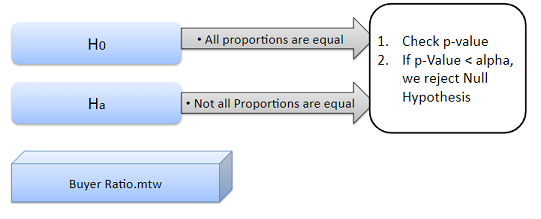

## Ans.

We are going to conduct a Test of Independence using Chi-Square  test with Contingency table. 
We need to check whether the proportion of any of these samples are different or same.

### Step 1

Make two Hypothesis one contradicting to other  
Null Hypothesis is what we want to prove  
<ul>
<li>Null Hypothesis: There is no association or dependency between the gender based buyer rations across regions  </li>
<li>Alternative Hypthosis: There is a significant association or dependency between the gender based buyer rations across regions  </li>
</ul>

### Step 2

Decide a cut-off value
<ul>
<li>Significance 5% </li>
<li>alpha = 0.05 </li>
</ul>
As it is a one-tailed test  
<ul>
<li>alpha = 1 - 0.95 = 0.05 </li>
</ul>

### Step 3

Collect Evidence

In [14]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
from scipy.stats import chi2_contingency

In [15]:
df=pd.read_csv('03_02_BuyerRatio.csv')
df.head(3)

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [16]:
no_of_rows=len(df.iloc[0:2,0])
no_of_columns=len(df.iloc[0,0:4])
degree_of_f=(no_of_rows-1)*(no_of_columns-1)
print('Degree of Freedom =',degree_of_f)

Degree of Freedom = 3


In [17]:
observed = df[['East','West','North','South']].values

### Step 4
Comparing Evidence with Hypothesis

#### Applying Chi-Square contingency table to convert observed value into expected value

In [18]:
chi2_statistic, p_value, df, expected = stats.chi2_contingency(observed)
chi2_statistic, p_value

(1.595945538661058, 0.6603094907091882)

#### Two methods to decide where we should accept or reject the null hypothesis.

#### Method A: Using Critical values

In [19]:
critical_value = stats.chi2.ppf(0.95,3)
critical_value

7.814727903251179

In [20]:
if chi2_statistic >= critical_value:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

Independent (fail to reject H0)


#### Method B: Using P values

In [21]:
p_value, 1-stats.chi2.cdf(chi2_statistic,3)

(0.6603094907091882, 0.6603094907091882)

In [22]:
alpha = 0.05
print('Significance=%.3f, p=%.3f\n' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significant difference between TAT of reports of the laboratories')
else:
    print('Independent. We fail to reject Null hypothesis')

Significance=0.050, p=0.660

Independent. We fail to reject Null hypothesis


### Since p_value > alpha, we fail to reject Null Hypothesis because of lack evidence. Therefore, there is no association or dependency between male-female buyers rations and are similar across regions.

# Assignment-03-Q4 (Hypothesis Testing)

TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain % of the customer order forms. Any error in order form renders it defective and has to be reworked before processing. The manager wants to check whether the defective % varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences.

## Ans.

We are going to conduct a Test of Independence using Chi-Square test with Contingency table. We need to check whether the mean of any of these samples are same or different.

### Step 1

Make two Hypothesis one contradicting to other  
Null Hypothesis is what we want to prove  
<ul>
<li>Null Hypothesis: μ1 = μ2 = μ3 = μ4</li>
<li>Alternative Hypthosis: Atleast One of them is Different </li>
</ul>

### Step 2

Decide a cut-off value
<ul>
<li>Significance 5% </li>
<li>alpha = 0.05 </li>
</ul>

### Step 3

Collect Evidence

In [23]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
from scipy.stats import chi2_contingency

In [24]:
df=pd.read_csv('03_03_Costomer+OrderForm.csv')
df.head(3)

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free


In [25]:
df.shape

(300, 4)

#### Applying descriptive statistics

In [26]:
df.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


#### Checking for Null Values

In [27]:
df.isnull().sum()

Phillippines    0
Indonesia       0
Malta           0
India           0
dtype: int64

In [28]:
df[df.isnull().any(axis=1)]

,Phillippines,Indonesia,Malta,India


#### Checking the data type

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


#### Checking value counts in data

In [30]:
df['India'].value_counts()

India
Error Free    280
Defective      20
Name: count, dtype: int64

In [31]:
vals = dict()

for x in df.columns.values:
    vals[x] = df[x].value_counts().values

df_new = pd.DataFrame(data=vals, index=['Error Free', 'Defective'])
df_new

,Phillippines,Indonesia,Malta,India
Error Free,271,267,269,280
Defective,29,33,31,20


#### Creating Contingency table

In [32]:
obs=np.array([[271,267,269,280],[29,33,31,20]])

#### Calculating Expected Values for Observed data

In [33]:
chi2_statistic, p_value, df, expected = stats.chi2_contingency(obs) 
chi2_statistic, p_value

(3.858960685820355, 0.2771020991233135)

#### Two methods to decide where we should accept or reject the null hypothesis.

#### Method A: Using Critical values

In [34]:
critical_value = stats.chi2.ppf(0.95,3)
critical_value

7.814727903251179

In [35]:
if chi2_statistic >= critical_value:
	print('Dependent (reject H0),variables are related')
else:
	print('Independent (fail to reject H0), variables are not related')

Independent (fail to reject H0), variables are not related


#### Method B: Using P values

In [36]:
p_value, 1-stats.chi2.cdf(chi2_statistic,3)

(0.2771020991233135, 0.2771020991233135)

In [37]:
alpha = 0.05
print('Significance=%.3f, p=%.3f\n' % (alpha, p_value))
if p_value <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

Significance=0.050, p=0.277

Independent (fail to reject H0)


### Since p_value > alpha, We fail to reject Null Hypothesis because of lack of evidence. Thus, customer order forms defective % does not varies by centre.